# Agenda

- Random Variables Definition
    
- Discrete Random Variables

- Probability Mass Functions and Cumulative Mass Functions for Discrete Random Variables

- Continuous Random Variables

- Probability Density Functions and Cumulative Density Functions for Continuous Random Variables.


## Random Variables

Informally: "A variable whose values depend on outcomes of a random phenomenon"

More informally: "A map from a random process's outcomes to numbers""

What about formally? Let's see!

[Note you really don't want to do this but it's your choice: Read definition part from Wikipedia](https://en.wikipedia.org/wiki/Random_variable)


### Examples

Let's start with a traditional one:

__Example:__
Experiment: rolling two dice: 

$X$ -- (This is usually how we denote a random variable.) {Sum of numbers on the dice}

Q: what are the possible values of $X$:

__Example:__ 

Experiment: Tossing a coin 

$X = 15$ if it is Head and $X =-10$ if it is Tail.


__Example:__ 

Experiment: Choosing a random person from Lafayatte Square

$Y$: This person's exact height in meters. 

Q: What are the possible values that Y can take?

__Example:__ 

Experiment: Pick a random point from the unit square.

$Z$: The x-coordinate of the point

Q: What are the possible values that Z can take?

In [1]:
import itertools
import numpy as np

## let's create a deck of cards
suits = ['diamonds', 'clubs', 'hearts', 'spades']

values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

cards = list(itertools.product(suits, values))



__Your Turn__

- Write a function that returns the sample space for the experiment of picking two cards from a deck of cards (without replacement).

In [9]:
cards[14]

('clubs', '2')

In [12]:
# %load -r 1-7 supplement.py
def create_sample_space(cards):
    sample_space = list(itertools.combinations(cards, 2))
    return sample_space

sample_space = create_sample_space(cards)



Let's us define a function $X: S \to \mathbb{N}$ on this sample space such that when X(card1, card2) = card1 + card2. 

(J = 10, Q = 10, K=10, A = 1)

Let's write this function in code:

__Your Turn__

- Write a function that corresponds to this random variable

In [14]:
two_cards = sample_space[123]

In [27]:
two_cards

card2 = two_cards[1]

card2[1] in royals

True

In [28]:
royals['K']

10

In [34]:
royals = {'A': 1, 'J': 10, 'Q': 10, 'K': 10}

def random_variable(two_cards):
    """two cards will be tuple of tuples in the form (('diamonds', 'A'), ('diamonds', '3'))"""
    card1 = two_cards[0]
    card2 = two_cards[1]
    num_card1 = card1[1]
    num_card2 = card2[1]
    
    if num_card1 in royals:
        num_card1 = royals[num_card1]
    if num_card2 in royals:
        num_card2 = royals[num_card2]
    total = int(num_card1) + int(num_card2)
    
    return total

## later on we will use this function as in this way


## Choose a two_cards randomly

card_index = np.random.choice(len(sample_space), 1)[0]
print(sample_space[card_index])

# Call the random_variable
random_variable(sample_space[card_index])



(('hearts', '6'), ('spades', 'K'))


16

In [ ]:
# %load -r 9-22 supplement.py
def random_variable(two_cards):
    """two cards will be tuple of tuples in the form (('diamonds', 'A'), ('diamonds', '3'))"""
    card1 = two_cards[0][1]
    card2 = two_cards[1][1]
    if card1 in royals:
        card1 = royals[card1]
    if card2 in royals:
        card2 = royals[card2]
    total = int(card1) + int(card2)
    return total

card_index = np.random.choice(len(sample_space), 1)[0]
print(sample_space[card_index])
random_variable(sample_space[card_index])

### Discrete and Continuous Random Variables

- Note that in the examples above we can count possible values for some random variables. These random variables are called __discrete random variables__.

- In other cases, it is not possible to be able to count exact possible values of a random variables. These are called __continuous random variables__. We can also say that continuous random variables can take any value in a range.


Q: Let's go back and decide which random variables are continuous and which ones are discrete.

## Distributions

Why do we study random variables?

- Random variables most of the time more relevant to the problem we would like to solve. 

Q: What is the probability distribution of a random variable?

A: It is a function from a random variables possible values to numbers again. 

- Exact definition of a distribution changes slightly depending on whether we are working with a discrete random variable or a continuous one. 

### Probability Mass Function

[For formal discussion](https://www.itl.nist.gov/div898/handbook/eda/section3/eda361.htm)

The probability mass function is the function which describes the probability associated with the random variable x. This function is named p(x) or P(X=x) to avoid confusion. P(X=x) corresponds to the probability that the random variable x take the value X 

### Simulation

Finding the probability mass function for the basic Black Jack game we created above.

__Your Turn__

- Find all possible values that random_variable function can take and keep these values in a list.

In [ ]:
## all_values = [  your code here  ]

In [48]:
[print("I'm an element of sample space  {}".format(a)) for a in sample_space[:10]]

I'm an element of sample space  (('diamonds', 'A'), ('diamonds', '2'))
I'm an element of sample space  (('diamonds', 'A'), ('diamonds', '3'))
I'm an element of sample space  (('diamonds', 'A'), ('diamonds', '4'))
I'm an element of sample space  (('diamonds', 'A'), ('diamonds', '5'))
I'm an element of sample space  (('diamonds', 'A'), ('diamonds', '6'))
I'm an element of sample space  (('diamonds', 'A'), ('diamonds', '7'))
I'm an element of sample space  (('diamonds', 'A'), ('diamonds', '8'))
I'm an element of sample space  (('diamonds', 'A'), ('diamonds', '9'))
I'm an element of sample space  (('diamonds', 'A'), ('diamonds', '10'))
I'm an element of sample space  (('diamonds', 'A'), ('diamonds', 'J'))


[None, None, None, None, None, None, None, None, None, None]

In [46]:
# %load -r 25 supplement.py
all_values = [random_variable(i) for i in sample_space]

Plotting Frequencies

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

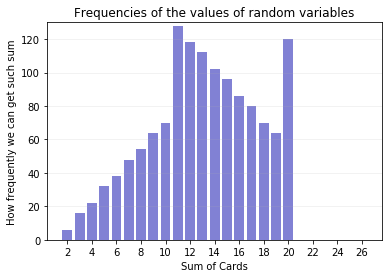

In [50]:
# plotting the hist
n, bins, patches = plt.hist(x=all_values, bins=range(2,28), color='#0504aa',
                            alpha=0.5, rwidth= 0.8,align = 'left' )

plt.xticks(range(2,28,2))

maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#labeling axis and title
plt.xlabel('Sum of Cards')
plt.ylabel('How frequently we can get such sum')
plt.title('Frequencies of the values of random variables')

plt.grid(axis='y', alpha=0.2)

plt.show()

In [51]:
len(sample_space)

1326

In [53]:
6/1326

0.004524886877828055

Counting Frequencies

In [55]:
from collections import Counter

Let's find how many times a value might appear. 

In [57]:
counter = Counter(all_values)

counter

Counter({3: 16,
         4: 22,
         5: 32,
         6: 38,
         7: 48,
         8: 54,
         9: 64,
         10: 70,
         11: 128,
         2: 6,
         12: 118,
         13: 112,
         14: 102,
         15: 96,
         16: 86,
         17: 80,
         18: 70,
         19: 64,
         20: 120})

In [ ]:
# counter = Counter( -- your code here --)

In [ ]:
# %load -r 27 supplement.py

Now as we have the counts we can convert them to probabilities: 

__Your Turn__

- Write a code that finds possible values and the probability of this value. Keep these results in a dictionary

- pmf[12] = 0.089 (pmf will be a dictionary)

In [59]:
counter.items()

dict_items([(3, 16), (4, 22), (5, 32), (6, 38), (7, 48), (8, 54), (9, 64), (10, 70), (11, 128), (2, 6), (12, 118), (13, 112), (14, 102), (15, 96), (16, 86), (17, 80), (18, 70), (19, 64), (20, 120)])

In [60]:
# %load -r 29-33 supplement.py
pmf = {}
for key, val in counter.items():
    pmf[key] = (round(val / len(all_values), 4))

print(pmf)

{3: 0.0121, 4: 0.0166, 5: 0.0241, 6: 0.0287, 7: 0.0362, 8: 0.0407, 9: 0.0483, 10: 0.0528, 11: 0.0965, 2: 0.0045, 12: 0.089, 13: 0.0845, 14: 0.0769, 15: 0.0724, 16: 0.0649, 17: 0.0603, 18: 0.0528, 19: 0.0483, 20: 0.0905}


In [63]:
pmf[2]

0.0045

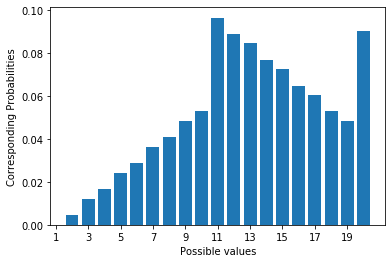

In [64]:
## we can plot the probability mass function
plt.bar(pmf.keys(), pmf.values())

plt.xticks(range(1,21,2))

plt.xlabel('Possible values')
plt.ylabel('Corresponding Probabilities')

plt.show()

In [65]:
pmf[15]

0.0724

### Cumulative Mass Function


The CDF is a function of $x$ just like a PMF or a PDF, where $x$ is any value that can possibly appear in a given distribution. To calculate the $CDF(x)$ for any value of $x$, we compute the proportion of values in the distribution less than or equal to $x$ as follows:

$$\large F(x) = P(X \leq x)$$

> The Cumulative Distribution Function, CDF, gives the probability that the variable $X$ is less than or equal to a certain possible value $x$. 



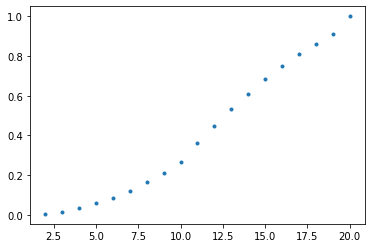

In [66]:
# plot cumulative mass function

x = np.unique(all_values, return_counts=True)[0]
y = np.cumsum(np.unique(all_values, return_counts=True)[1])/len(all_values)
plt.plot(x, y, marker='.', linestyle='none')
plt.show()

In [72]:
cdf[12]

0.4494720965309201

In [67]:
cdf = dict(zip(x,y))

cdf

{2: 0.004524886877828055,
 3: 0.016591251885369532,
 4: 0.033182503770739065,
 5: 0.05731523378582202,
 6: 0.08597285067873303,
 7: 0.12217194570135746,
 8: 0.16289592760180996,
 9: 0.21116138763197587,
 10: 0.26395173453996984,
 11: 0.36048265460030166,
 12: 0.4494720965309201,
 13: 0.5339366515837104,
 14: 0.6108597285067874,
 15: 0.6832579185520362,
 16: 0.7481146304675717,
 17: 0.808446455505279,
 18: 0.861236802413273,
 19: 0.9095022624434389,
 20: 1.0}

### Further Discussions


- Please read the corresponding material form learn.co. Especially the definitions of expected values and variance.

- Note that one of the most important discrete distribution is Bernoulli and Binomial distributions. We will discuss these in more details but make sure that you read the corresponding material in learn.co.

## Probability Density Functions

- First observation: For a cont. random variable the probability of getting an exact value is always zero. (Bummer!!)

- In that sense, instead of exact probabilities we will talk about density of the random variables. 


- A Probability Density Function (PDF) helps identify the regions in the distribution where observations are more likely to occur, in other words, where the observation occurrence is more dense.


<img src="img/probability_for_continuous_rv.png" width="650">

- In this case, probability is found by the following formula: 

$$\large P(82 \leq X \leq 85) = \int_{82}^{85} f_x(x) dx \geq 0 $$

- Let's consider the example where the random variable is the exact measure of height of a randomly chosen person from Lafayatte Park.

[Let's use a function to simulate this situation](https://learn.co/tracks/data-science-career-v2/module-3-probability-sampling-and-ab-testing/section-18-statistical-distributions/the-probability-density-function)
